# DATA-DRIVEN CUSTOMER SEGMENTATION WITH AI FOR IMPROVED MARKET INSIGHTS AND DECISION-MAKING.

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"


 <div style="color:green;font-size:150%"><b> 1. Importing necessary libraries</b></div>  

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import os
for dirname, _, filenames in os.walk(r'C:\Users\sisod\OneDrive\Desktop\project'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

 <div style="color:green;font-size:150%"><b> 2. Selection of color palette</b></div>  

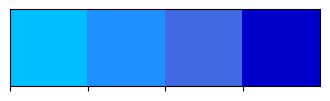

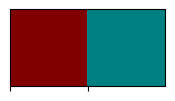

In [3]:
# --- Create List of Color Palletes ---
blue_palette=['#00bfff','#1e90ff','#4169e1','#0000cd']
mixt_palette = ['#800000', '#008080']

# --- Plot Color Palletes --
sns.palplot(blue_palette)
sns.palplot(mixt_palette)

 <div style="color:green;font-size:150%"><b> 3. Loading of Data</b></div>

In [4]:
df=pd.read_csv(r"C:\Users\sisod\OneDrive\Desktop\project/Mall_Customers.csv")
df_styled = df.head(10).reset_index(drop=True).style.background_gradient(cmap='plasma').set_properties(**{'font-family': 'Segoe UI'})
df_styled  # Display the styled DataFrame


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\sisod\\OneDrive\\Desktop\\project/Mall_Customers.csv'

In [ ]:
df.shape

(200, 5)

In [ ]:
#summary of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
#Drop CustomerID from dataset
df.drop('CustomerID',axis=1,inplace=True)

 <div style = "color:green;font-size:150%"><b> 4. Data Vizualization</b></div>

#### Histogramme & Boxplot: Visualization of continious variables

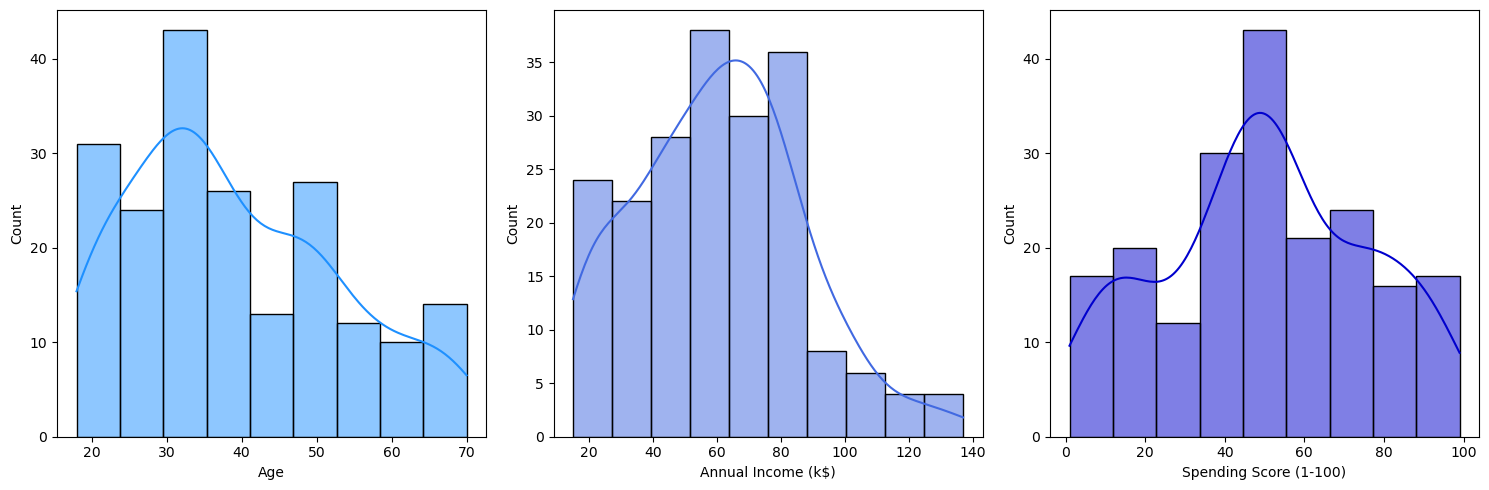

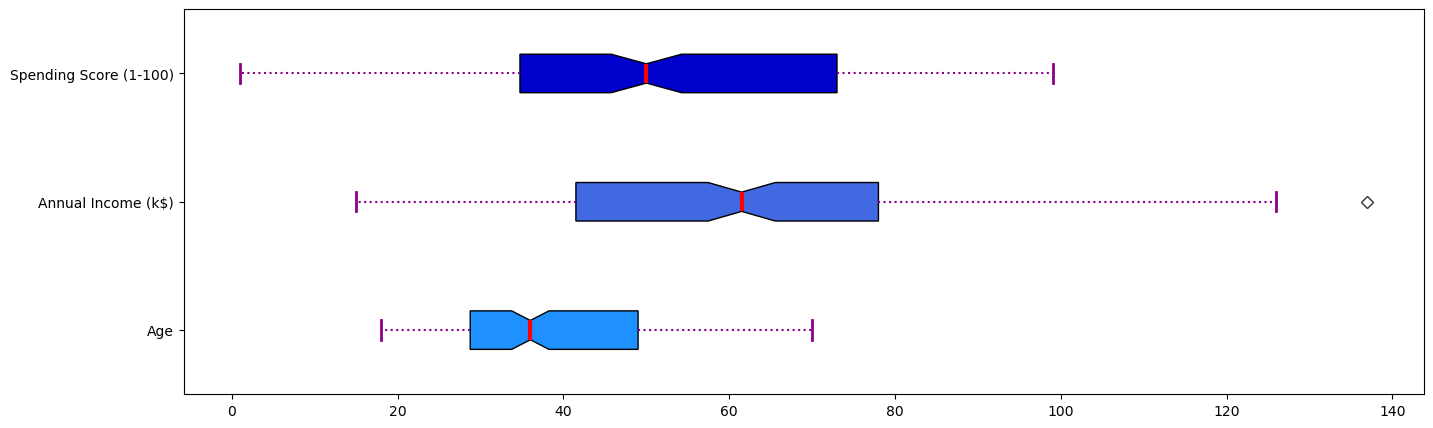

In [ ]:
#------------------CREAT HISTOGRAME---------------------------------
f, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
sns.histplot(x="Age", data=df, color=blue_palette[1],kde=True,ax=axes[0])
sns.histplot(x="Annual Income (k$)", data=df, color=blue_palette[2],kde=True,ax=axes[1])
sns.histplot(x="Spending Score (1-100)", data=df, color=blue_palette[3],kde=True,ax=axes[2])
f.tight_layout()
plt.show()

# --------------CREAT BOXPLOT----------------------------------------
features= ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
 
fig = plt.figure(figsize =(16, 5))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot(df[features], patch_artist = True,
                notch ='True', vert = 0)
 
colors = [blue_palette[1], blue_palette[2] ,blue_palette[3]]
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
 
# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
 
# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)
 
# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
 
# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)
     
# x-axis labels
ax.set_yticklabels(['Age', 'Annual Income (k$)',
                    'Spending Score (1-100)'])

# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
     
# show plot
plt.show()

#### Barplot & Pie-chart : Visualisation of the categorical variable "Gender" 

C:\Users\sisod\AppData\Local\Temp\ipykernel_19348\194871120.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Gender', data=df, palette=colors, order=counts,


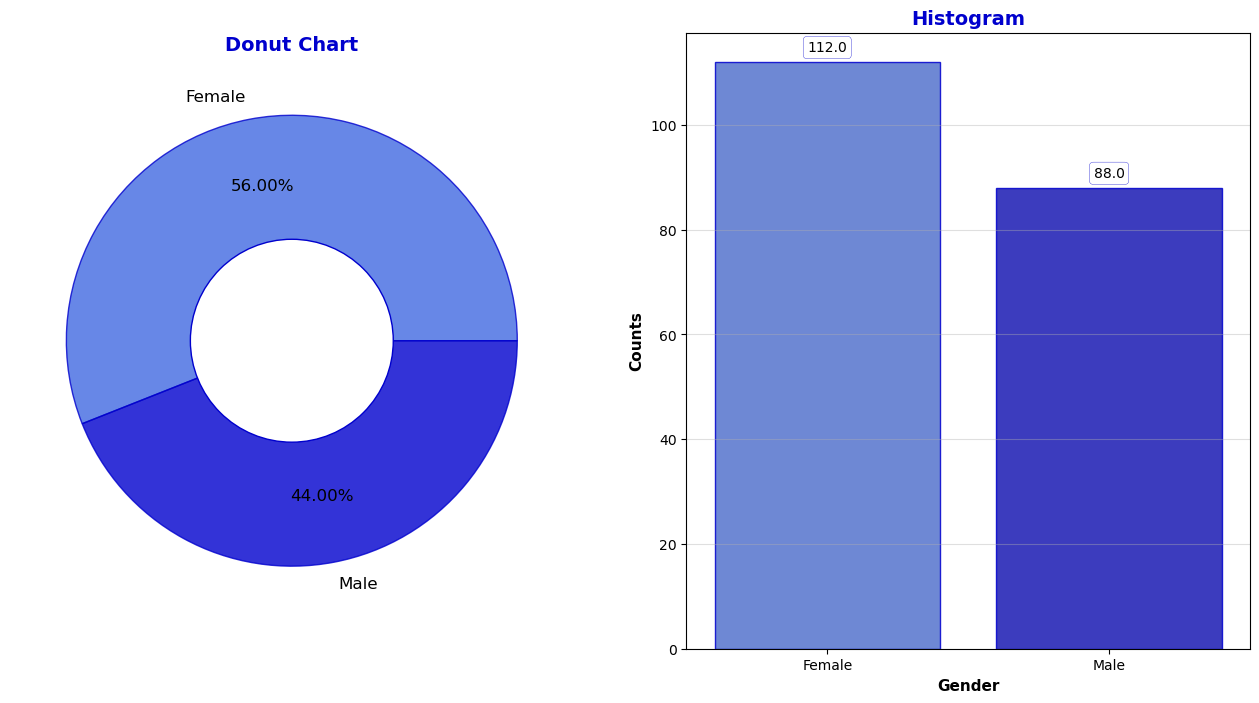

In [ ]:

colors=[blue_palette[2],blue_palette[3]]
labels=['Female', 'Male']
counts=df['Gender'].value_counts().index


plt.figure(figsize=(16, 8))


# --- Donute Chart ---
plt.subplot(1, 2, 1)
plt.title('Donut Chart', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color=blue_palette[3])
plt.pie(df['Gender'].value_counts(), labels=labels, colors=colors, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor=blue_palette[3]),
        textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=blue_palette[3])
plt.gcf().gca().add_artist(centre)

# --- Barplot ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=blue_palette[3])
ax = sns.countplot(x='Gender', data=df, palette=colors, order=counts,
                   edgecolor=blue_palette[3], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+2,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
             bbox=dict(facecolor='none', edgecolor=blue_palette[3], 
                       linewidth=0.25, boxstyle='round'))

plt.xlabel('Gender', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.ylabel('Counts', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)

#### Marginal Histogram : visualizing the relationship between features

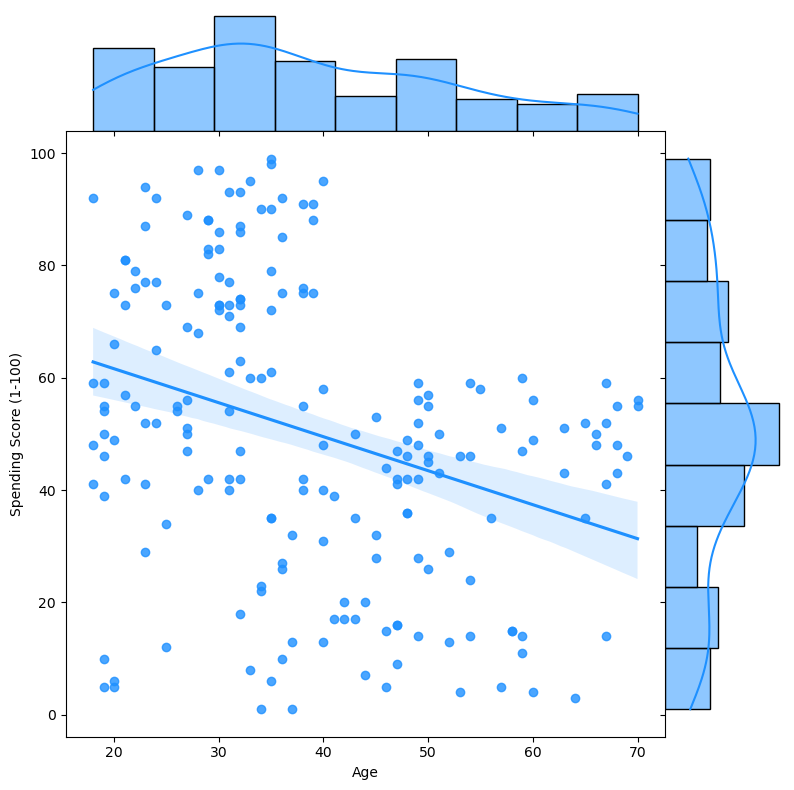

In [ ]:
sns.jointplot(x="Age", y="Spending Score (1-100)",data=df, kind='reg',height=8, color=blue_palette[1],space=0)

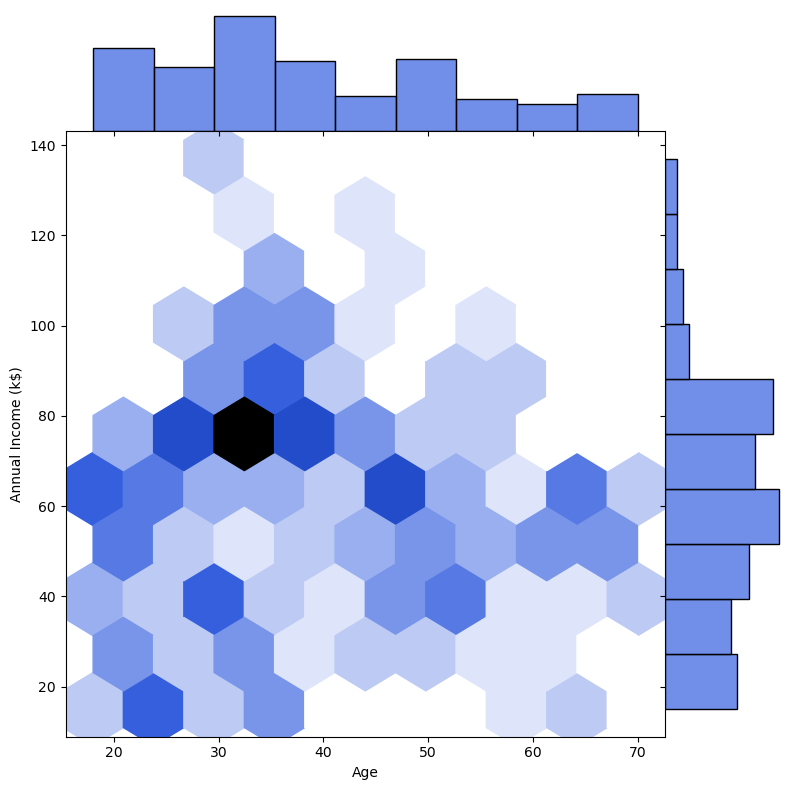

In [ ]:
sns.jointplot(x=df["Age"], y=df["Annual Income (k$)"], kind='hex', color=blue_palette[2],height=8,ratio=5,space=0)

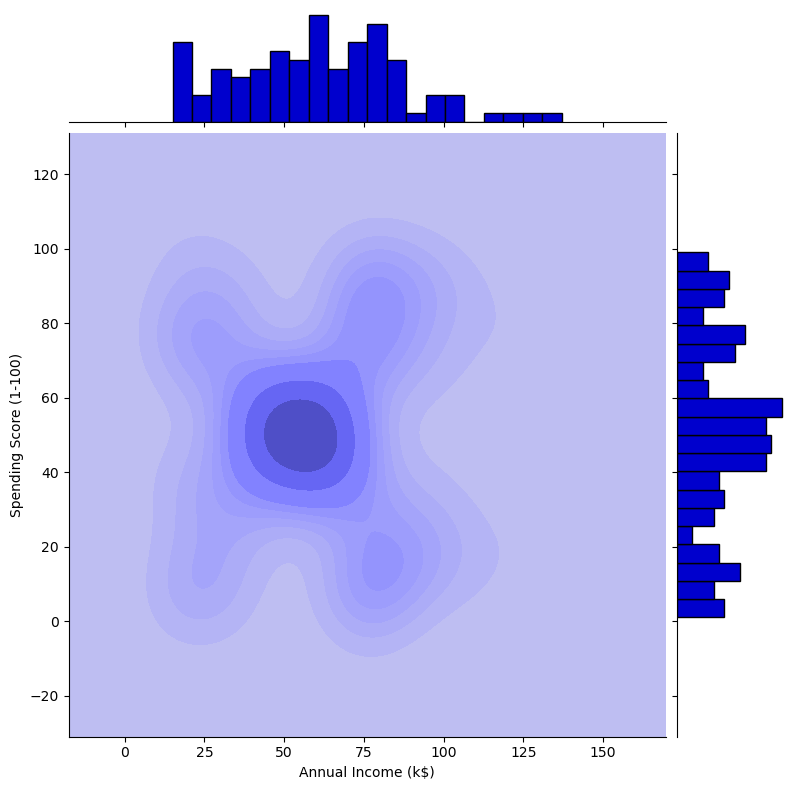

In [ ]:
#"Spending Score" VS "Annual Income"
g = sns.JointGrid(data = df, height = 8, x = "Annual Income (k$)", y = "Spending Score (1-100)", space = 0.1)
g.plot_joint(sns.kdeplot, fill = True, thresh = 0, color = blue_palette[3])
g.plot_marginals(sns.histplot, color = blue_palette[3], alpha = 1, bins = 20);

#### Scatter plot  : visualizing the relationship with linear regression line of best fit

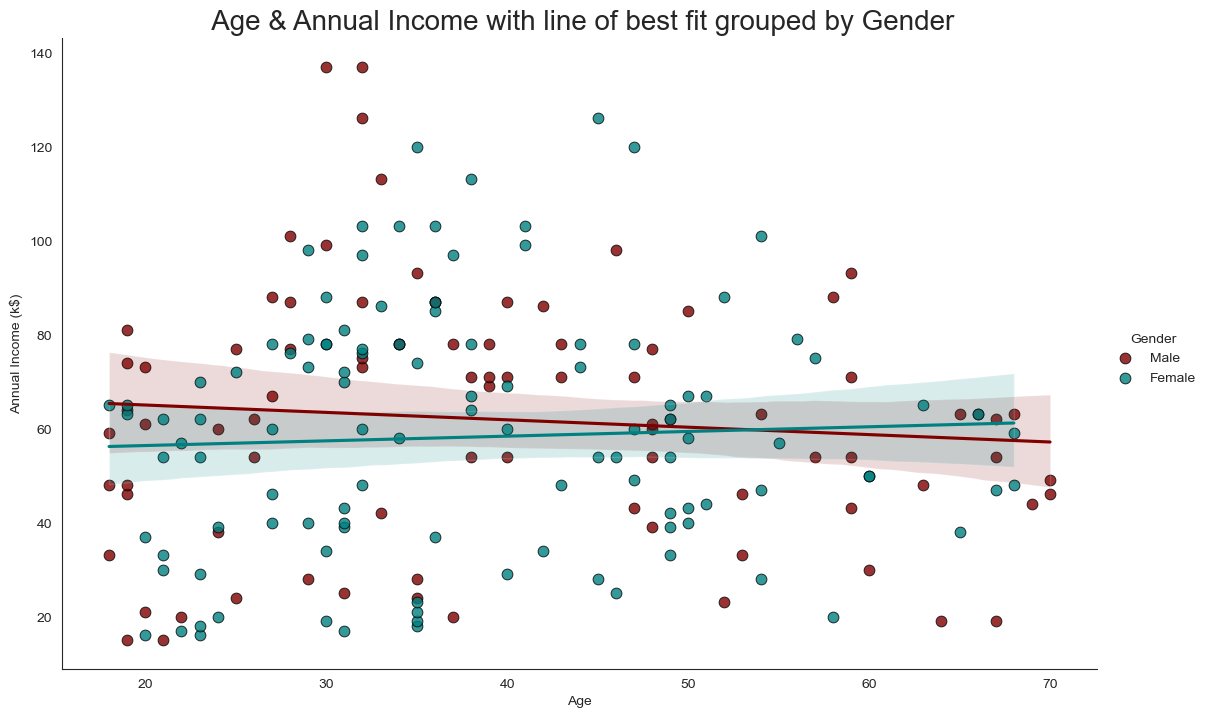

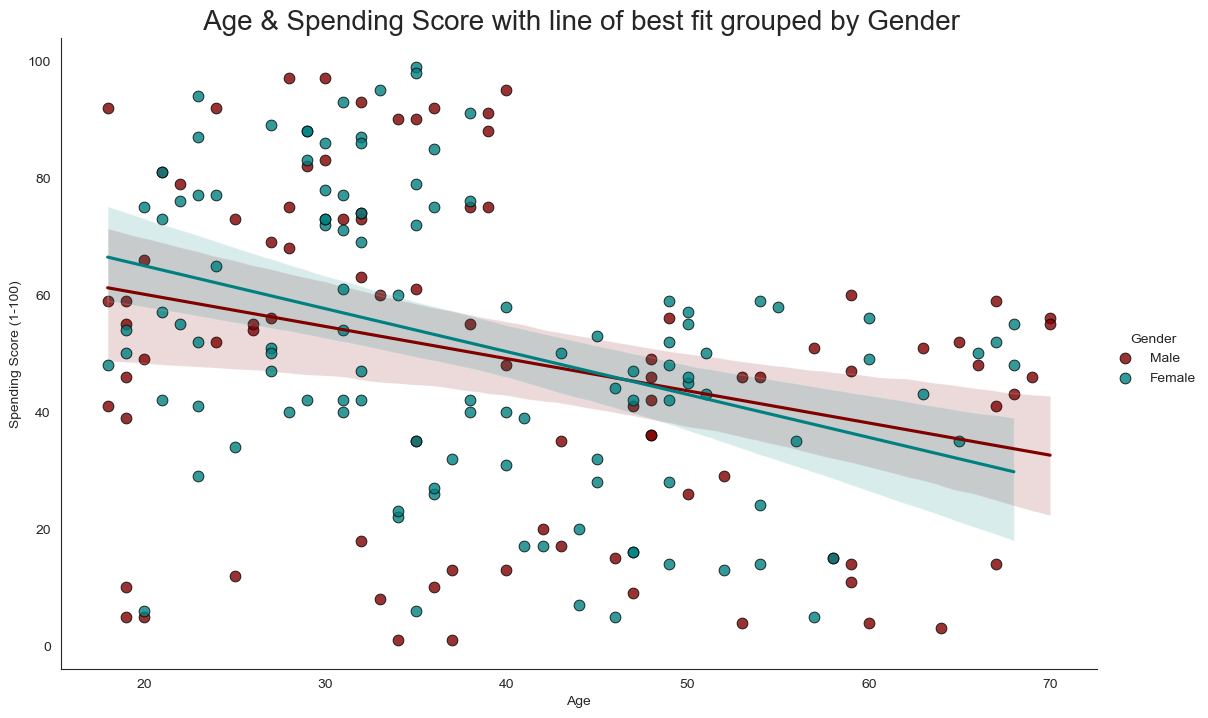

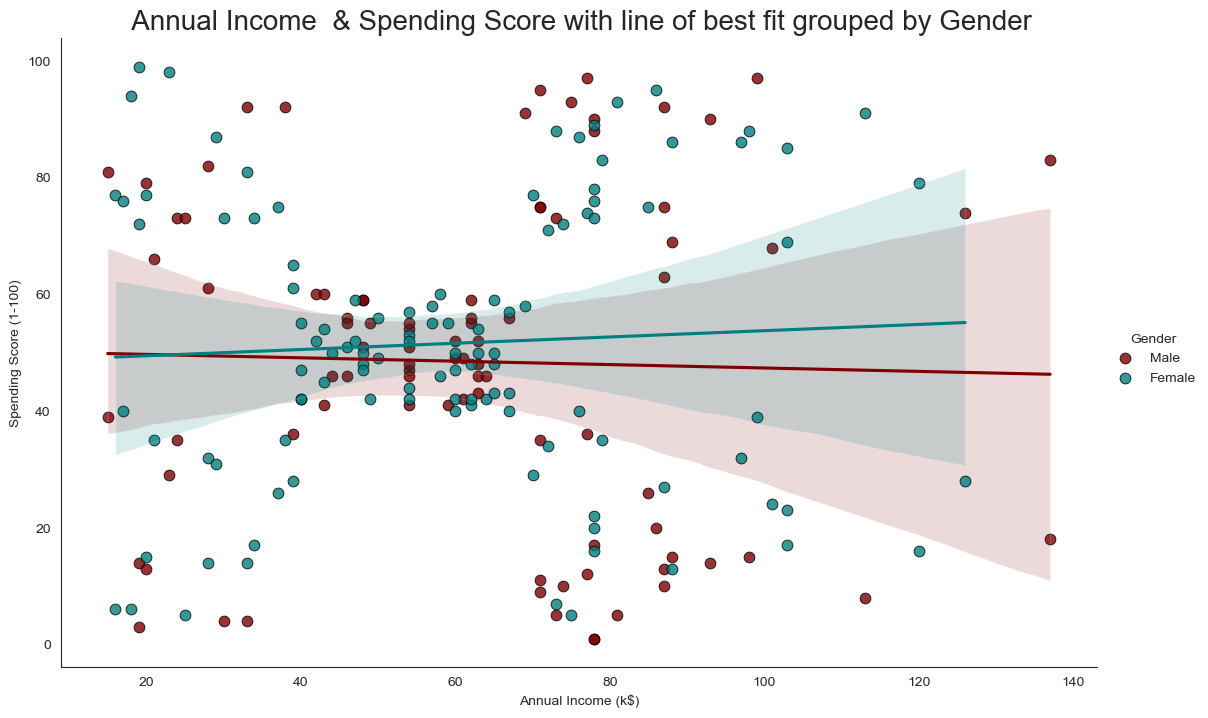

In [ ]:
# Plot
sns.set_style("white")
gridobj = sns.lmplot(x="Age", y="Annual Income (k$)", hue="Gender", data=df, 
                     height=7, aspect=1.6, robust=True, palette=mixt_palette, 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))
plt.title(" Age & Annual Income with line of best fit grouped by Gender", fontsize=20)
plt.show()

# Plot
sns.set_style("white")
gridobj = sns.lmplot(x="Age", y="Spending Score (1-100)", hue="Gender", data=df, 
                     height=7, aspect=1.6, robust=True, palette=mixt_palette, 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))
plt.title(" Age & Spending Score with line of best fit grouped by Gender", fontsize=20)
plt.show()

# Plot
sns.set_style("white")
gridobj = sns.lmplot(x="Annual Income (k$)", y="Spending Score (1-100)", hue="Gender", data=df, 
                     height=7, aspect=1.6, robust=True, palette=mixt_palette, 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))
plt.title(" Annual Income  & Spending Score with line of best fit grouped by Gender", fontsize=20)
plt.show()

#### Heatmap  : visualizing the correlation between feaures

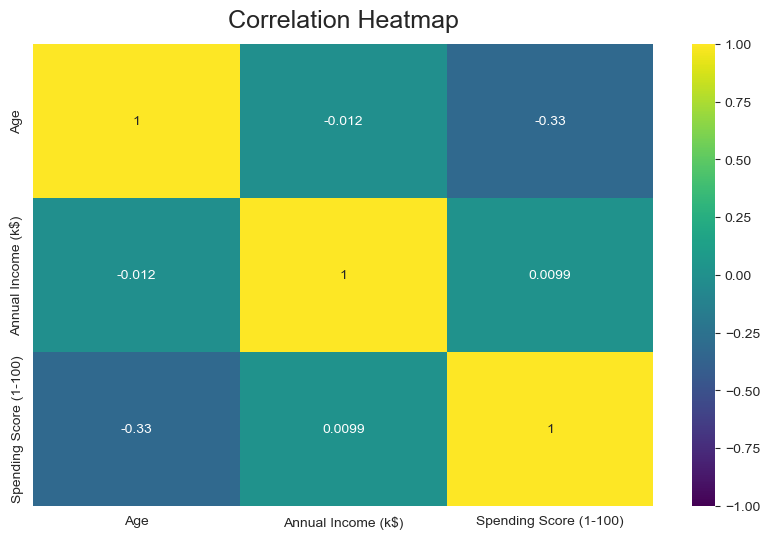

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure you're working with only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Create the heatmap
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(numeric_df.corr(), vmin=-1, vmax=1, annot=True, cmap='viridis')

# Set title and adjust padding
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 18}, pad=12)

plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

# Optionally, display the plot
plt.show()

 <div style="color:green;font-size:150%"><b> 4. Data Pre-processing</b></div>  

#### Standardizing variables

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming df is your original DataFrame and col_names is already defined
col_names = ['Annual Income (k$)', 'Age', 'Spending Score (1-100)']

# Initialize StandardScaler
sd = StandardScaler()

# Extract the features and scale them
features = df[col_names]
scaler = sd.fit(features.values)
features = scaler.transform(features.values)

# Create a new DataFrame with the scaled features
scaled_features = pd.DataFrame(features, columns=col_names)

# Display the DataFrame with styling
styled_df = scaled_features.head().style.background_gradient(cmap='plasma').set_properties(**{'font-family': 'Segoe UI'}).hide(axis='index')

# Display the styled DataFrame
styled_df

Annual Income (k$),Age,Spending Score (1-100)
-1.738999,-1.424569,-0.434801
-1.738999,-1.281035,1.195704
-1.700830,-1.352802,-1.715913
-1.700830,-1.137502,1.040418
-1.662660,-0.563369,-0.395980


In [ ]:
gender = df['Gender']
newdf = scaled_features.join(gender)
newdf = pd.get_dummies(newdf, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)
newdf = newdf.drop(['Gender_Male'],axis=1)
newdf.head().style.background_gradient(cmap='plasma') \
    .set_properties(**{'font-family': 'Segoe UI'}) \
    

,Annual Income (k$),Age,Spending Score (1-100),Gender_Female
0,-1.738999,-1.424569,-0.434801,False
1,-1.738999,-1.281035,1.195704,False
2,-1.700830,-1.352802,-1.715913,True
3,-1.700830,-1.137502,1.040418,True
4,-1.662660,-0.563369,-0.395980,True


 <div style="color:green;font-size:150%"><b> 5. Building the clustering model with k-means</b></div>  

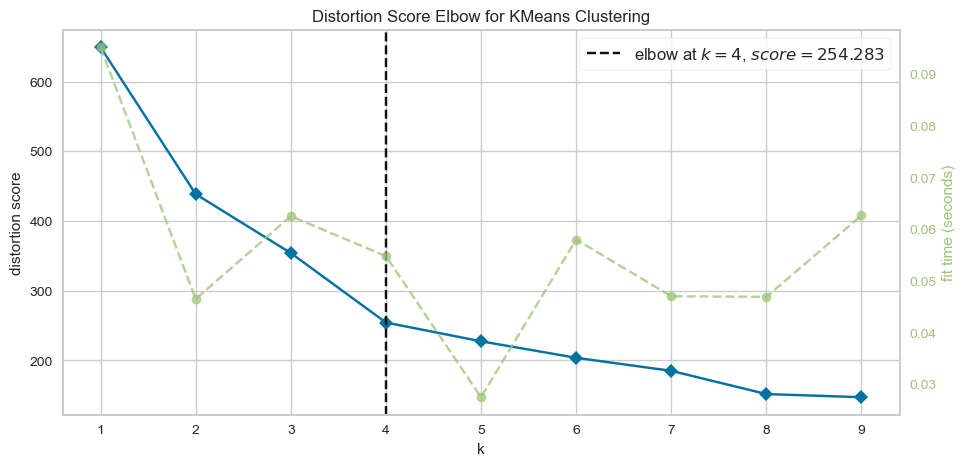

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()

visualizer = KElbowVisualizer(model, k=(1,10),size=(1080, 500))

visualizer.fit(newdf)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

#### Implimentation of k-means & Silhouette coefficient metric

In [ ]:
# First, build a model with 4 clusters

kmeans = KMeans(n_clusters = 4, init='k-means++',random_state=42)
kmeans.fit(newdf)

# Now, print the silhouette score of this model

print("silhouette_score is :",silhouette_score(newdf, kmeans.labels_, metric='euclidean'))

silhouette_score is : 0.35044061449694197


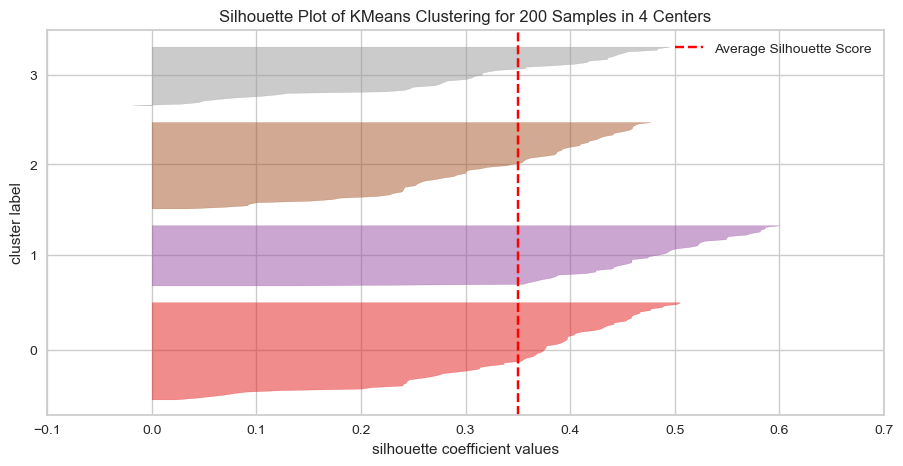

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 200 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer 
kmeans1 = KMeans(n_clusters = 4, init='k-means++',random_state=42)
visualizer = SilhouetteVisualizer(kmeans1,size=(1080, 500))

visualizer.fit(newdf)    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

In [ ]:
clusters = kmeans.fit_predict(df.iloc[:,1:])
newdf["label"] = clusters
newdf.head().style.background_gradient(cmap='plasma').set_properties(**{'font-family': 'Segoe UI'}) 

,Annual Income (k$),Age,Spending Score (1-100),Gender_Female,label
0,-1.738999,-1.424569,-0.434801,False,2
1,-1.738999,-1.281035,1.195704,False,2
2,-1.700830,-1.352802,-1.715913,True,0
3,-1.700830,-1.137502,1.040418,True,2
4,-1.662660,-0.563369,-0.395980,True,0


#### Visualization of clusters built by the model

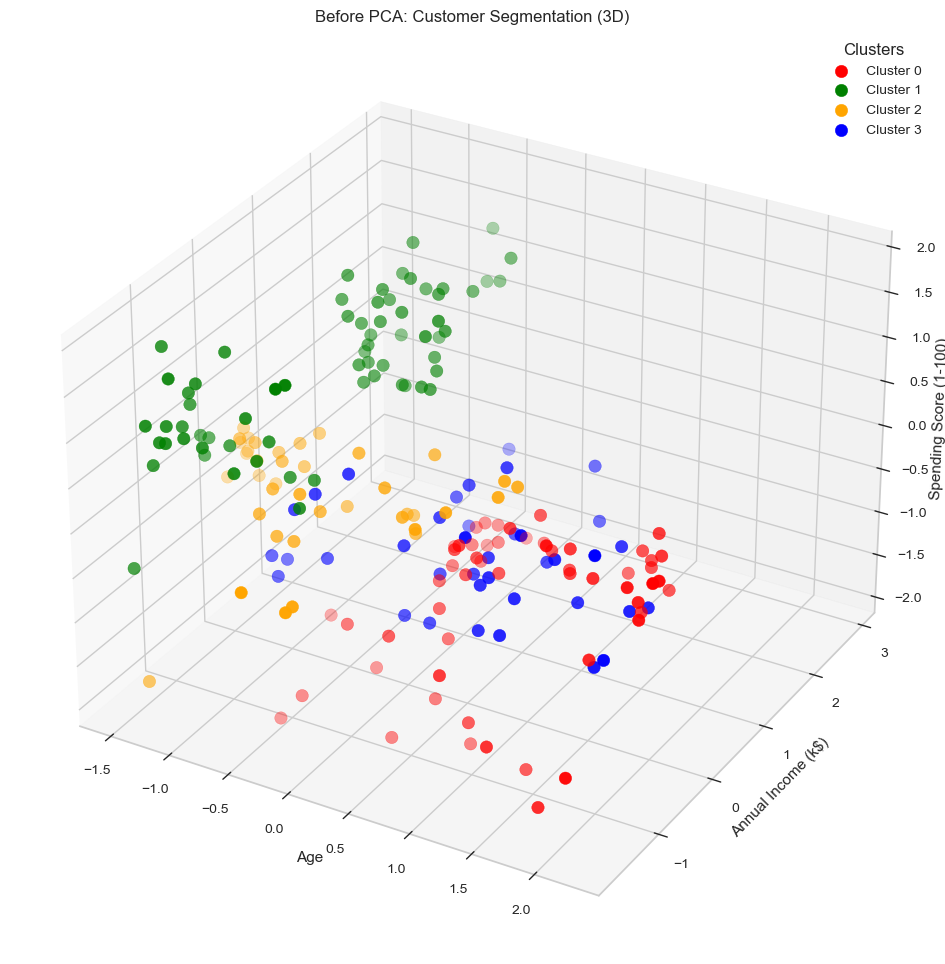

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# Scatter plots with labels
ax.scatter(newdf.Age[newdf["label"] == 0], 
           newdf["Annual Income (k$)"][newdf["label"] == 0], 
           newdf["Spending Score (1-100)"][newdf["label"] == 0], 
           c='red', s=80, label='Cluster 0')

ax.scatter(newdf.Age[newdf["label"] == 1], 
           newdf["Annual Income (k$)"][newdf["label"] == 1], 
           newdf["Spending Score (1-100)"][newdf["label"] == 1], 
           c='green', s=80, label='Cluster 1')

ax.scatter(newdf.Age[newdf["label"] == 2], 
           newdf["Annual Income (k$)"][newdf["label"] == 2], 
           newdf["Spending Score (1-100)"][newdf["label"] == 2], 
           c='orange', s=80, label='Cluster 2')

ax.scatter(newdf.Age[newdf["label"] == 3], 
           newdf["Annual Income (k$)"][newdf["label"] == 3], 
           newdf["Spending Score (1-100)"][newdf["label"] == 3], 
           c='blue', s=80, label='Cluster 3')

# Adding axis labels
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")

# Adding legend
ax.legend(title="Clusters")  # Ensure the legend appears
plt.title("Before PCA: Customer Segmentation (3D)")

# Display the plot
plt.show()


 <div style="color:green;font-size:150%"><b> 5. Implementation of PCA(Principal Component Analysis)</b></div>  

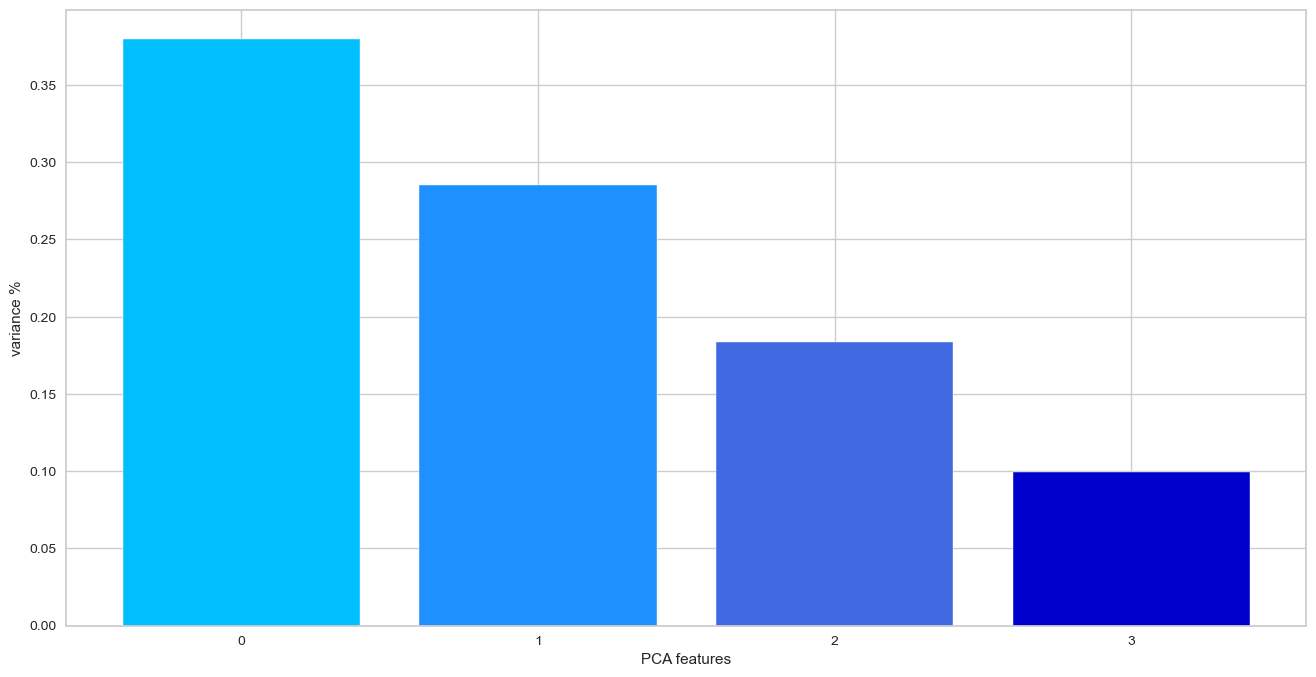

In [ ]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(newdf)
features = range(pca.n_components_)
plt.figure(figsize=(16,8))
plt.bar(features, pca.explained_variance_ratio_, color=blue_palette[0:4])
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)

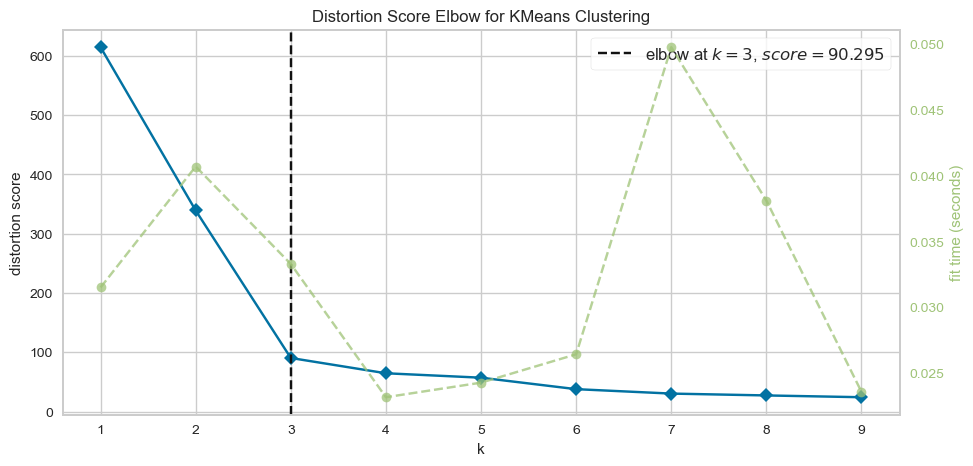

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10),size=(1080, 500))

visualizer.fit(PCA_components.iloc[:,:2])        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
model = KMeans(n_clusters=4, init='k-means++',random_state=42)
model.fit(PCA_components.iloc[:,:2])

# silhouette score
print("silhouette_score is :",silhouette_score(PCA_components.iloc[:,:2], model.labels_, metric='euclidean')) 

silhouette_score is : 0.555830099738977


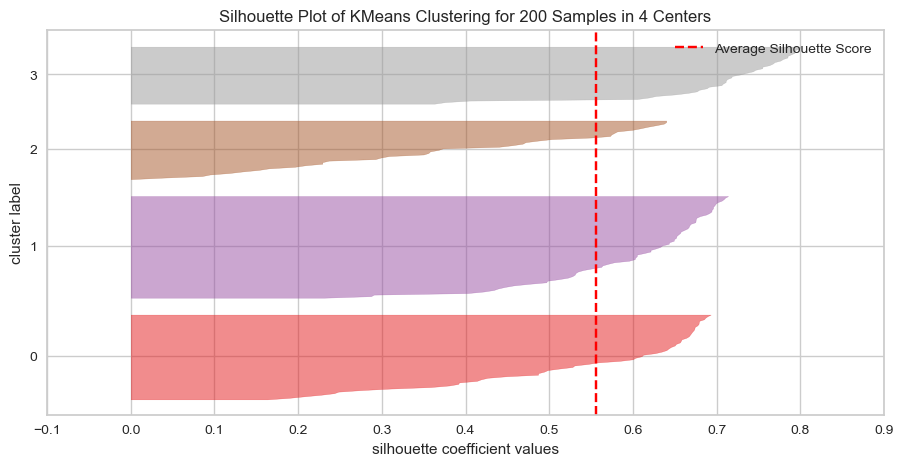

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 200 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
model1 = KMeans(n_clusters = 4, init='k-means++',random_state=42)
visualizer = SilhouetteVisualizer(model1,size=(1080, 500))
visualizer.fit(PCA_components.iloc[:,:2])    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure)    # Fit the data to the visualizer

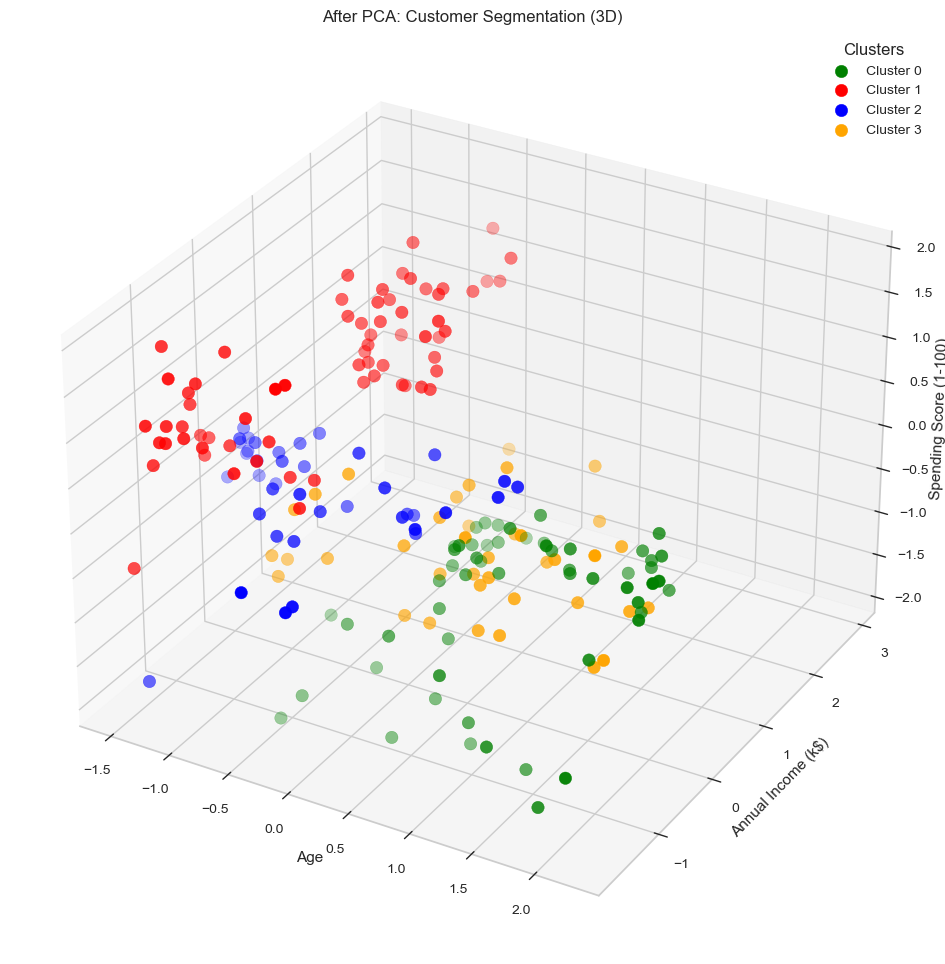

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Assuming newdf and clusters are already created
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# Plotting clusters with labels
ax.scatter(newdf.Age[newdf["label"] == 0], 
           newdf["Annual Income (k$)"][newdf["label"] == 0], 
           newdf["Spending Score (1-100)"][newdf["label"] == 0], 
           c='green', s=80, label='Cluster 0')

ax.scatter(newdf.Age[newdf["label"] == 1], 
           newdf["Annual Income (k$)"][newdf["label"] == 1], 
           newdf["Spending Score (1-100)"][newdf["label"] == 1], 
           c='red', s=80, label='Cluster 1')

ax.scatter(newdf.Age[newdf["label"] == 2], 
           newdf["Annual Income (k$)"][newdf["label"] == 2], 
           newdf["Spending Score (1-100)"][newdf["label"] == 2], 
           c='blue', s=80, label='Cluster 2')

ax.scatter(newdf.Age[newdf["label"] == 3], 
           newdf["Annual Income (k$)"][newdf["label"] == 3], 
           newdf["Spending Score (1-100)"][newdf["label"] == 3], 
           c='orange', s=80, label='Cluster 3')

# Adding axis labels
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")

# Adding legend
ax.legend(title="Clusters")  # Ensure the legend appears with cluster labels
plt.title("After PCA: Customer Segmentation (3D)")

# Show plot
plt.show()


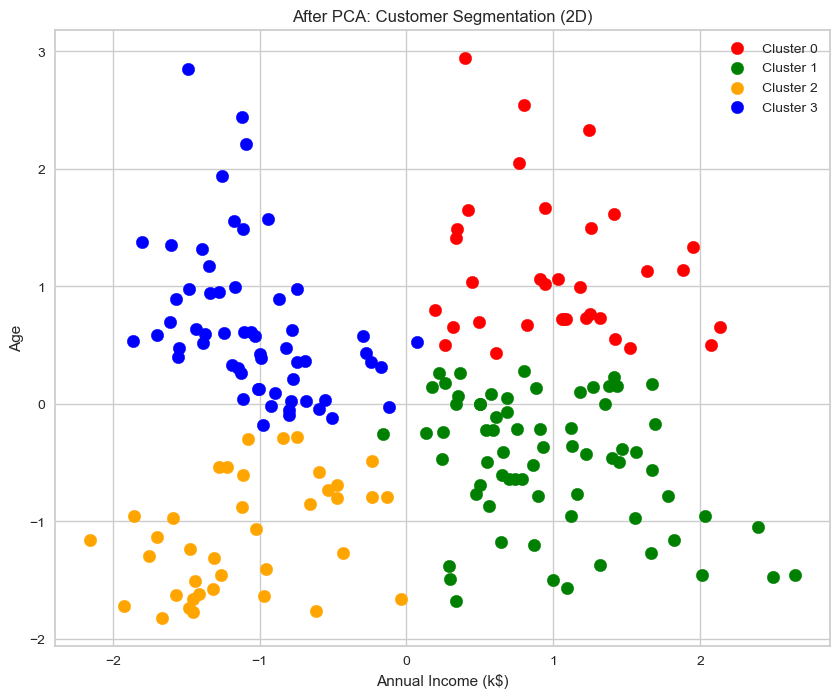

In [ ]:
# Apply PCA to reduce data to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply KMeans clustering to the PCA-reduced data
df['label_pca'] = kmeans.fit_predict(X_pca)

# Plotting After PCA (2D scatter plot)
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[df['label_pca'] == 0, 0], X_pca[df['label_pca'] == 0, 1], c='red', s=80, label='Cluster 0')
plt.scatter(X_pca[df['label_pca'] == 1, 0], X_pca[df['label_pca'] == 1, 1], c='green', s=80, label='Cluster 1')
plt.scatter(X_pca[df['label_pca'] == 2, 0], X_pca[df['label_pca'] == 2, 1], c='orange', s=80, label='Cluster 2')
plt.scatter(X_pca[df['label_pca'] == 3, 0], X_pca[df['label_pca'] == 3, 1], c='blue', s=80, label='Cluster 3')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Age")
plt.title("After PCA: Customer Segmentation (2D)")
plt.legend()
plt.show()



 <div style="color:green;font-size:150%"><b>6.  Cluster Analysis and customors segmentation </b></div>  

In [ ]:
df=pd.read_csv(r"C:\Users\sisod\OneDrive\Desktop\project/Mall_Customers.csv")
df = df.drop(['CustomerID'],axis=1)

# map back clusters to dataframe

pred = model.predict(PCA_components.iloc[:,:2])
frame = pd.DataFrame(df)
frame['cluster'] = pred
frame.head().style.background_gradient(cmap='plasma').set_properties(**{'font-family': 'Segoe UI'})

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load the data
df = pd.read_csv(r"C:\Users\sisod\OneDrive\Desktop\project/Mall_Customers.csv")
df = df.drop(['CustomerID'], axis=1)

# Assuming PCA_components is already calculated
# Predict clusters
pred = model.predict(PCA_components.iloc[:, :2])

# Create a new DataFrame with clusters
frame = df.copy()  # Create a copy of df
frame['cluster'] = pred

# Display the first few rows with styling
frame.head().style.background_gradient(cmap='plasma').set_properties(**{'font-family': 'Segoe UI'})




,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,2
3,Female,23,16,77,1
4,Female,31,17,40,2


In [ ]:
# Exclude non-numeric columns before grouping
numeric_columns = frame.select_dtypes(include=['number', 'float']).columns

# Group by cluster and calculate the mean for numeric columns
avg_df = frame[numeric_columns].groupby(frame['cluster'], as_index=False).mean()

# Style and visualize the average DataFrame
avg_df.style.background_gradient(cmap='plasma').set_properties(**{'font-family': 'Segoe UI'})


,Age,Annual Income (k$),Spending Score (1-100),cluster
0,54.964286,45.375000,39.089286,0.000000
1,29.402985,62.373134,78.835821,1.000000
2,30.435897,53.487179,47.717949,2.000000
3,40.394737,87.000000,18.631579,3.000000


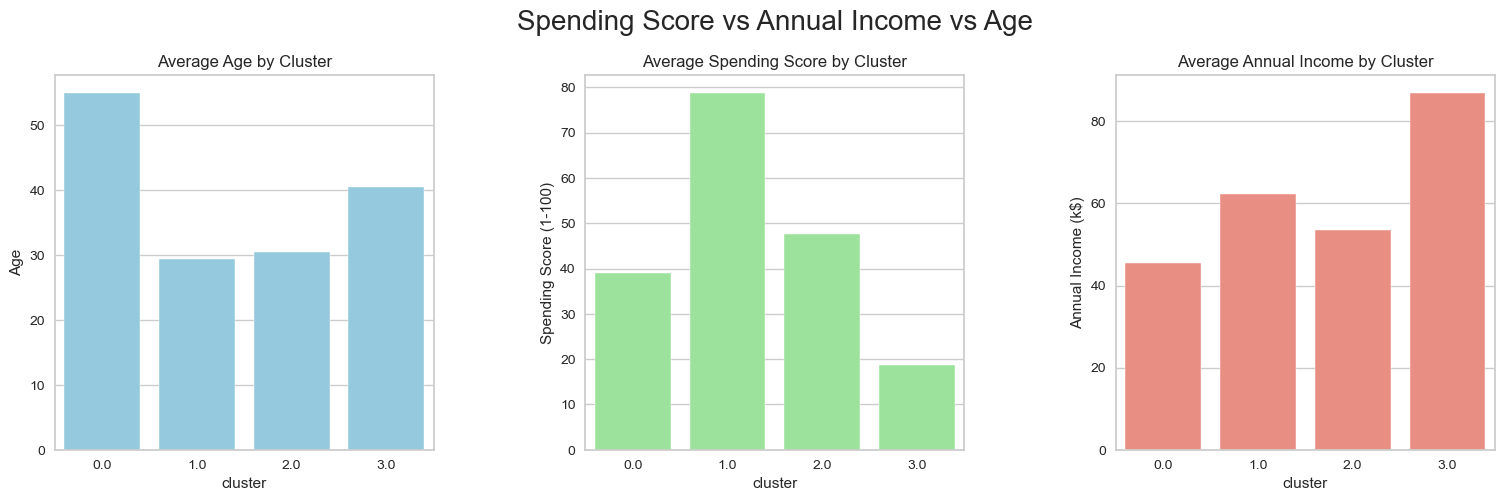

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Use a consistent color scheme without triggering warnings
sns.barplot(x='cluster', y='Age', data=avg_df, ax=ax[0], color='skyblue')
sns.barplot(x='cluster', y='Spending Score (1-100)', data=avg_df, ax=ax[1], color='lightgreen')
sns.barplot(x='cluster', y='Annual Income (k$)', data=avg_df, ax=ax[2], color='salmon')

# Set titles for each subplot
ax[0].set_title("Average Age by Cluster")
ax[1].set_title("Average Spending Score by Cluster")
ax[2].set_title("Average Annual Income by Cluster")

# Set a global title
plt.suptitle('Spending Score vs Annual Income vs Age', fontsize=20)

# Adjust layout
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.85, wspace=0.4)

# Show the plot
plt.show()


In [ ]:
# Ensure you are using the correct DataFrame with the 'cluster' column
df2 = pd.DataFrame(frame.groupby(['cluster', 'Gender'])['Gender'].count())

# Display the first 8 rows
df2.head(8)


Gender
cluster Gender        
0       Female      31
        Male        25
1       Female      35
        Male        32
2       Female      28
        Male        11
3       Female      18
        Male        20

From the above visualisations we can observe the following things:

<span style="background-color:orange"><b>Cluster 0:<b></span>

* High average annual income, low average spending capacity.
* Mean age is around 40 and gender is predominantly male.
    
<span style="background-color:orange"><b>Cluster 1:<b></span>

* High average income, high spending score.
* Mean age is around 30 and gender is predominantly female.

<span style="background-color:orange"><b>Cluster 2:<b></span>

* Low average income, high spending score.
* Mean age is around 25 and gender is predominantly female.
    
<span style="background-color:orange"><b>Cluster 3:<b></span>

* Low to mid average income, average spending capacity.
* Mean age is around 50 and gender is predominantly female.